In [1]:
# Run this code!
# It sets up the graphing configuration.
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

In [2]:
import pandas as pd
import numpy as np

# Loads the SVM library
from sklearn import svm

# Loads the dataset
dataset = pd.read_csv('Data/trees.csv')

print(dataset.head())
###

   leaf_width  leaf_length  trunk_girth  trunk_height  tree_type
0        5.13         6.18         8.26          8.74          0
1        7.49         4.02         8.07          6.78          0
2        9.22         4.16         5.46          8.45          1
3        6.98        11.10         6.96          4.06          2
4        3.46         5.19         8.72         10.40          0


No handles with labels found to put in legend.


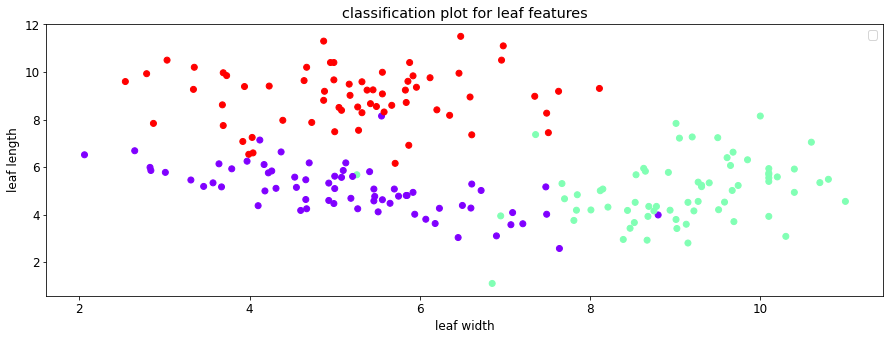

In [3]:
# Run this code to plot the leaf features

# This extracts the features. drop() deletes the column we state (tree_type), leaving on the features
allFeatures = dataset.drop(['tree_type'], axis = 1)

# This keeps only the column we state (tree_type), leaving only our label
labels = np.array(dataset['tree_type'])

#Plots the graph
X = allFeatures['leaf_width']
Y = allFeatures['leaf_length']
color=labels
graph.scatter(X, Y, c = color)
graph.title('classification plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')
graph.legend()
graph.show()

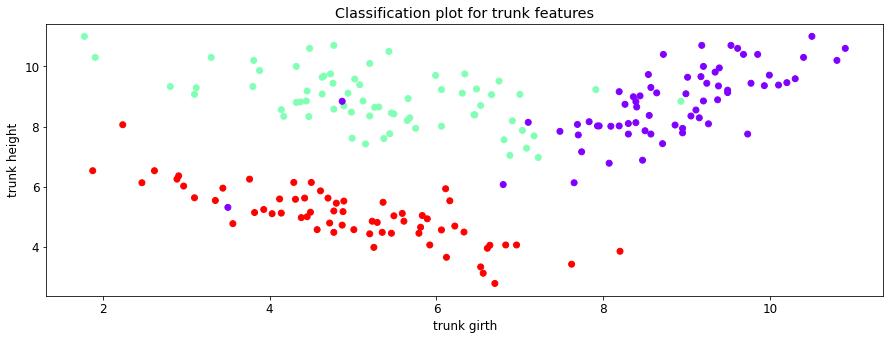

In [4]:
# Run this code to plot the trunk features
graph.scatter(allFeatures['trunk_girth'], allFeatures['trunk_height'], c = labels)
graph.title('Classification plot for trunk features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')
graph.show()

### SVM para las características de la hoja

In [6]:
# Sets up the feature and target sets for leaf features

# Feature 1
feature_one = allFeatures['leaf_width'].values

# Feature 2
feature_two = allFeatures['leaf_length'].values

# Features
train_X = np.asarray([feature_one, feature_two]).transpose()

# Labels
train_Y = labels 

# Fits the SVM model
model = svm.SVC().fit(train_X, train_Y)
###
print("Model ready. Now plot it to see the result.")

Model ready. Now plot it to see the result.


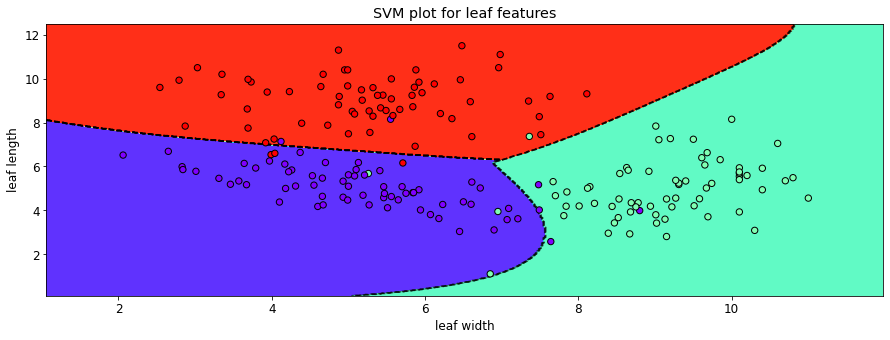

In [7]:
# Run this to plots the SVM model
X_min, X_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
Y_min, Y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(feature_one, feature_two, c = train_Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha=0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')

graph.show()

### SVM para las características del tronco

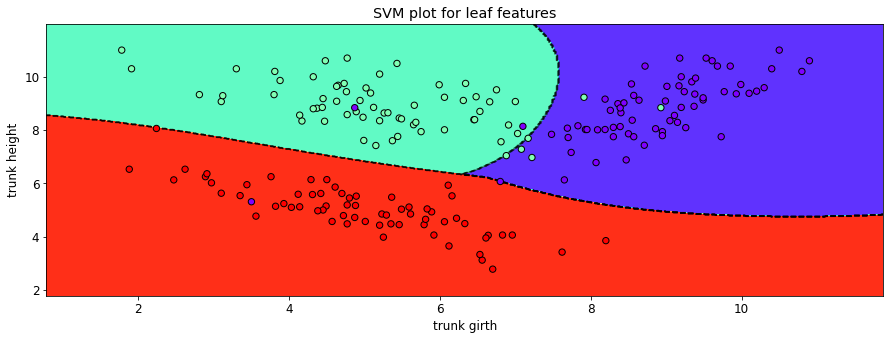

In [8]:
# Feature 1
trunk_girth = allFeatures['trunk_girth'].values
###

# Feature 2
trunk_height = allFeatures['trunk_height'].values
###

# Features
trunk_features = np.asarray([trunk_girth, trunk_height]).transpose()

# Fits the SVM model
model = svm.SVC().fit(trunk_features, train_Y)

# Plots the SVM model
X_min, X_max = trunk_features[:, 0].min() - 1, trunk_features[:, 0].max() + 1
Y_min, Y_max = trunk_features[:, 1].min() - 1, trunk_features[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(trunk_girth, trunk_height, c = train_Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha = 0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')

graph.show()